In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import load_df_florida

In [18]:
from yahist import set_default_style, Hist1D
set_default_style()

In [19]:
dfc = load_df_florida()

In [20]:
dfc

,age,case,died,eventdate,gender,hospitalized,known_status
0,27,2020-07-08 05:00:00,False,2020-07-07,F,NO,True
1,59,2020-06-26 05:00:00,False,2020-06-25,M,NO,True
2,38,2020-05-22 05:00:00,False,2020-05-03,F,NO,True
3,92,2020-05-22 05:00:00,False,2020-05-19,F,NO,True
4,93,2020-05-22 05:00:00,False,2020-05-11,F,NO,True
...,...,...,...,...,...,...,...
232713,27,2020-07-07 05:00:00,False,2020-07-07,M,UNKNOWN,False
232714,9,2020-07-07 05:00:00,False,2020-07-07,F,UNKNOWN,False
232715,22,2020-07-07 05:00:00,False,2020-07-07,M,UNKNOWN,False
232716,65,2020-07-07 05:00:00,False,2020-07-07,M,UNKNOWN,False


In [21]:
dfc["died"].value_counts()

False    226880
True       4109
Name: died, dtype: int64

In [22]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230989 entries, 0 to 232717
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   age           230989 non-null  int64         
 1   case          230989 non-null  datetime64[ns]
 2   died          230989 non-null  bool          
 3   eventdate     230989 non-null  datetime64[ns]
 4   gender        230989 non-null  object        
 5   hospitalized  227936 non-null  object        
 6   known_status  230989 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(1), object(2)
memory usage: 11.0+ MB


In [23]:
dfc["gender"].value_counts()

F    117054
M    113935
Name: gender, dtype: int64

In [24]:
dfc["hospitalized"].value_counts()

UNKNOWN    115398
NO          94642
YES         17465
NA            431
Name: hospitalized, dtype: int64

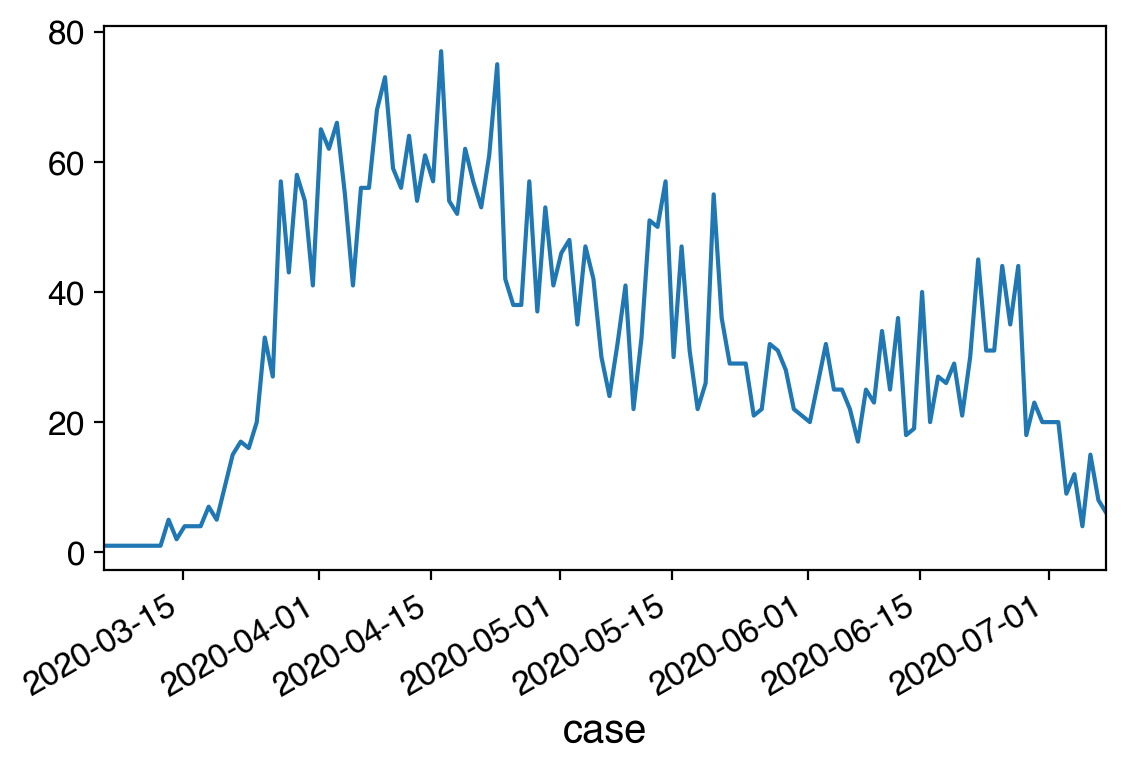

In [25]:
# dfc.groupby("case")["gender"].count().plot()
dfc.query("died").groupby("case")["gender"].count().plot()
# dfc.groupby("eventdate")["gender"].count().plot()

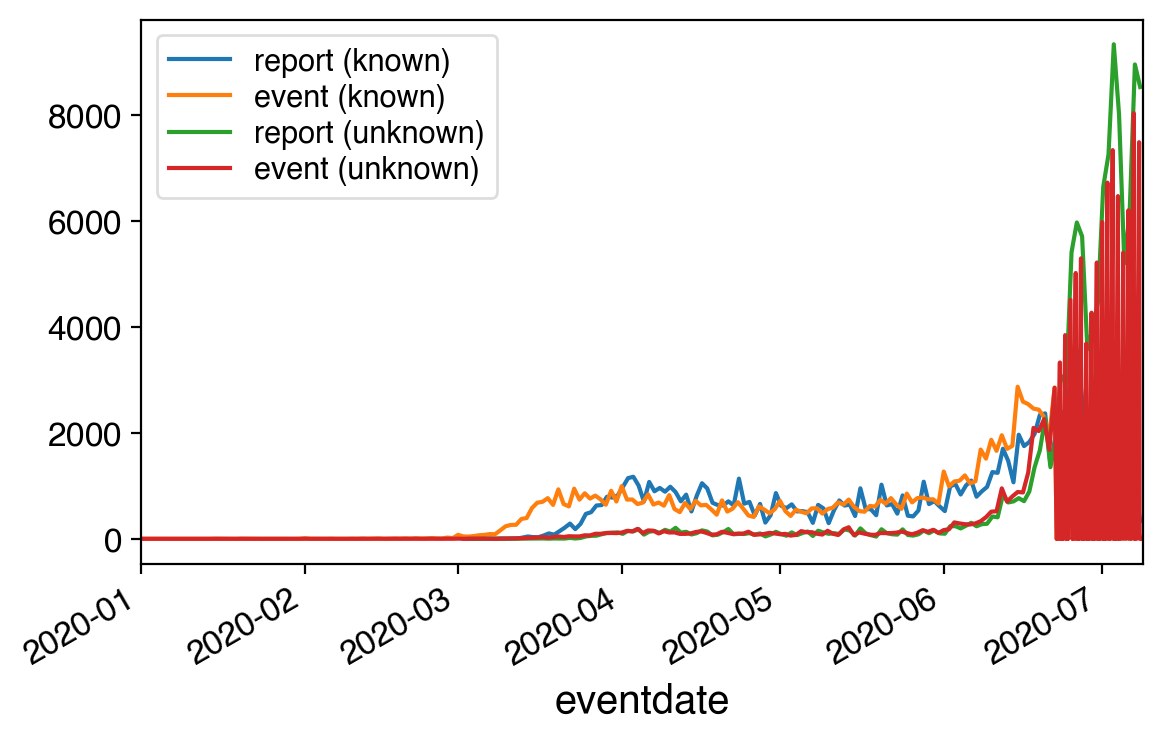

In [26]:
df = dfc.query("known_status")
df.groupby("case")["gender"].count().plot(label="report (known)")
df.groupby("eventdate")["gender"].count().plot(label="event (known)")

df = dfc.query("not known_status")
df.groupby("case")["gender"].count().plot(label="report (unknown)")
df.groupby("eventdate")["gender"].count().plot(label="event (unknown)")

plt.gca().legend()

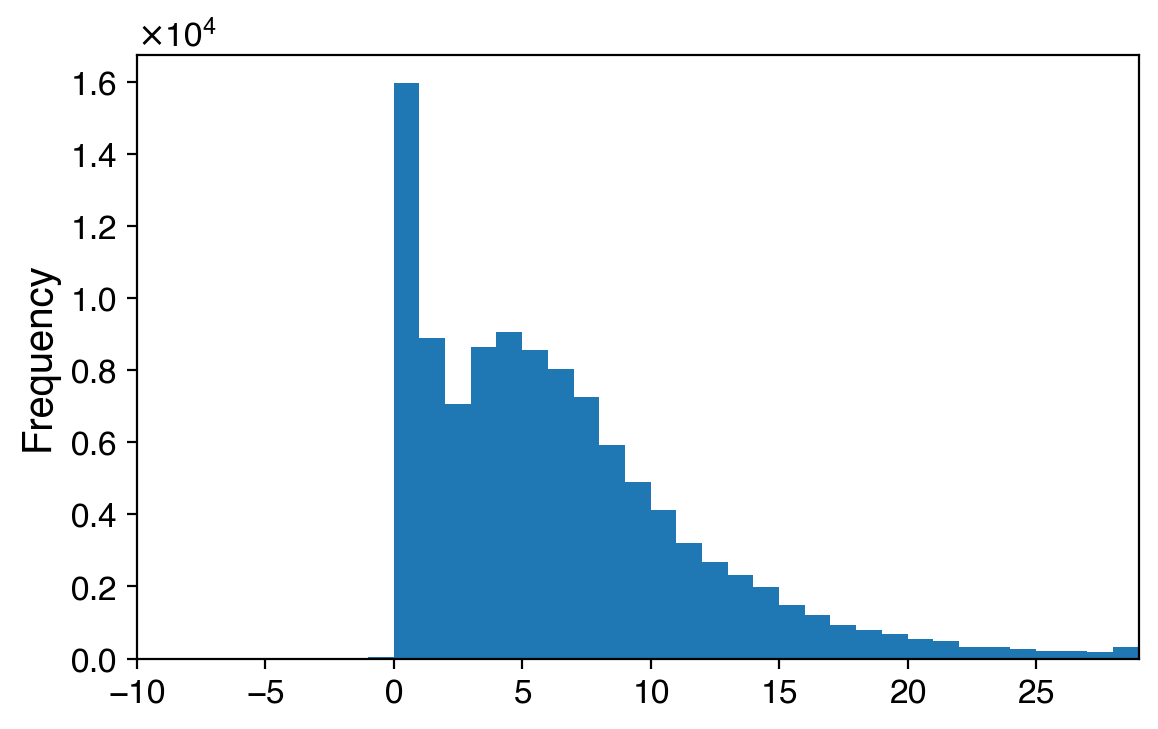

In [27]:
df = dfc.query("not died and known_status")
((df["case"]-df["eventdate"]).dt.days).plot.hist(bins=np.arange(-10,30))

In [28]:
dfc["age"].astype(int)

0         27
1         59
2         38
3         92
4         93
          ..
232713    27
232714     9
232715    22
232716    65
232717    15
Name: age, Length: 230989, dtype: int64

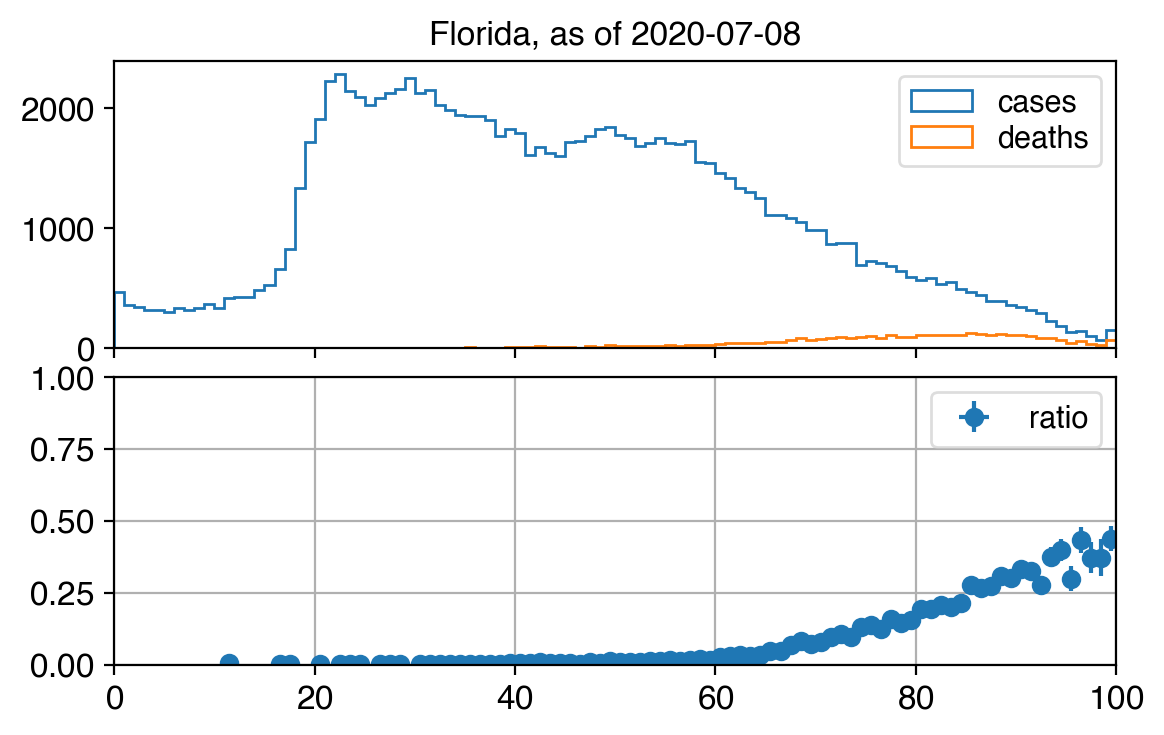

In [30]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)

bins = "100,0,100"

# dfnumer = dfc.query("died")
dfnumer = dfc.query("died and known_status")
dfdenom = dfc.query("known_status")

hnumer = Hist1D(dfnumer["age"],bins=bins)
hdenom = Hist1D(dfdenom["age"],bins=bins)

hdenom.plot(ax=ax1, label="cases", histtype="step")
hnumer.plot(ax=ax1, label="deaths", histtype="step")

# ax1.set_yscale("log")

hratio = hnumer.divide(hdenom,binomial=True)
hratio.plot(ax=ax2, show_errors=True, label="ratio")

ax1.set_title(f"Florida, as of {str(dfc['case'].max()).split()[0]}")
ax2.set_ylim(bottom=0.,top=1.)
ax1.legend()
ax2.legend()
ax2.grid()

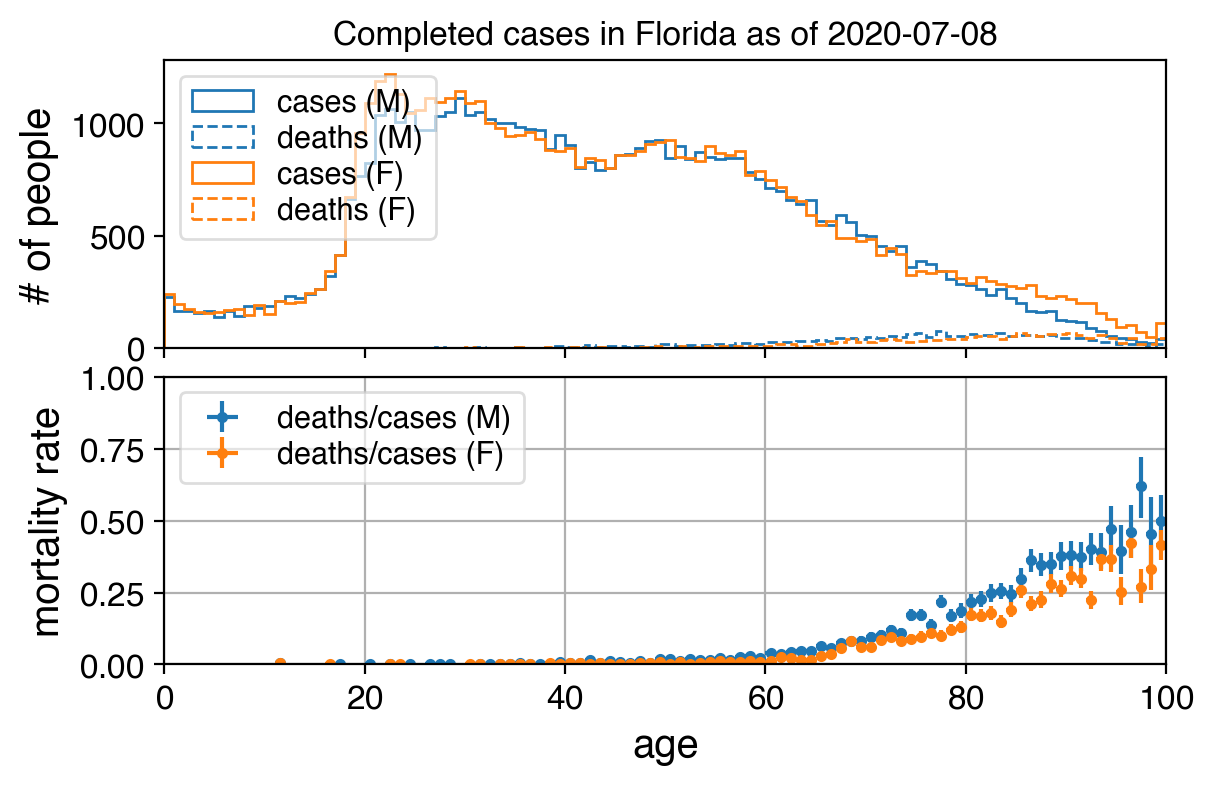

In [31]:

fig, (ax1,ax2) = plt.subplots(2,sharex=True)

def hists_gender(gender, bins="100,0,100", known=True):
    if gender in ["M","F"]:
        selstr = f"gender=='{gender}'"
    else:
        selstr = "gender!='X'"
    if known:
        selstr += " and known_status"
    dfnumer = dfc.query(selstr + " and died")
    dfdenom = dfc.query(selstr)
    hnumer = Hist1D(dfnumer["age"],bins=bins)
    hdenom = Hist1D(dfdenom["age"],bins=bins)
    hratio = hnumer.divide(hdenom,binomial=True)
    return hnumer, hdenom, hratio

hnumer, hdenom, hratio = hists_gender("M")
hdenom.plot(ax=ax1, label="cases (M)", histtype="step", color="C0")
hnumer.plot(ax=ax1, label="deaths (M)", histtype="step", color="C0", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (M)", color="C0", ms=3)

hnumer, hdenom, hratio = hists_gender("F")
hdenom.plot(ax=ax1, label="cases (F)", histtype="step", color="C1")
hnumer.plot(ax=ax1, label="deaths (F)", histtype="step", color="C1", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (F)", color="C1", ms=3)

# hnumer, hdenom, hratio = hists_gender("M", known=False)
# hdenom.plot(ax=ax1, label="cases (M), all", histtype="step", color="C2")
# hnumer.plot(ax=ax1, label="deaths (M), all", histtype="step", color="C2", linestyle="--")
# hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (M), all", color="C2", ms=3)

# hnumer, hdenom, hratio = hists_gender("F", known=False)
# hdenom.plot(ax=ax1, label="cases (F), all", histtype="step", color="C3")
# hnumer.plot(ax=ax1, label="deaths (F), all", histtype="step", color="C3", linestyle="--")
# hratio.plot(ax=ax2, show_errors=True, label="deaths/cases (F), all", color="C3", ms=3)


last = str(dfc['case'].max()).split()[0]
ax1.set_title(f"Completed cases in Florida as of {last}")
# ax1.set_yscale("log")
ax1.legend(loc="upper left")
ax1.set_ylabel("# of people")

ax2.legend(loc="upper left")
ax2.set_ylabel("mortality rate")
ax2.set_ylim(bottom=0.,top=1.0)
ax2.set_xlabel("age")
ax2.grid()

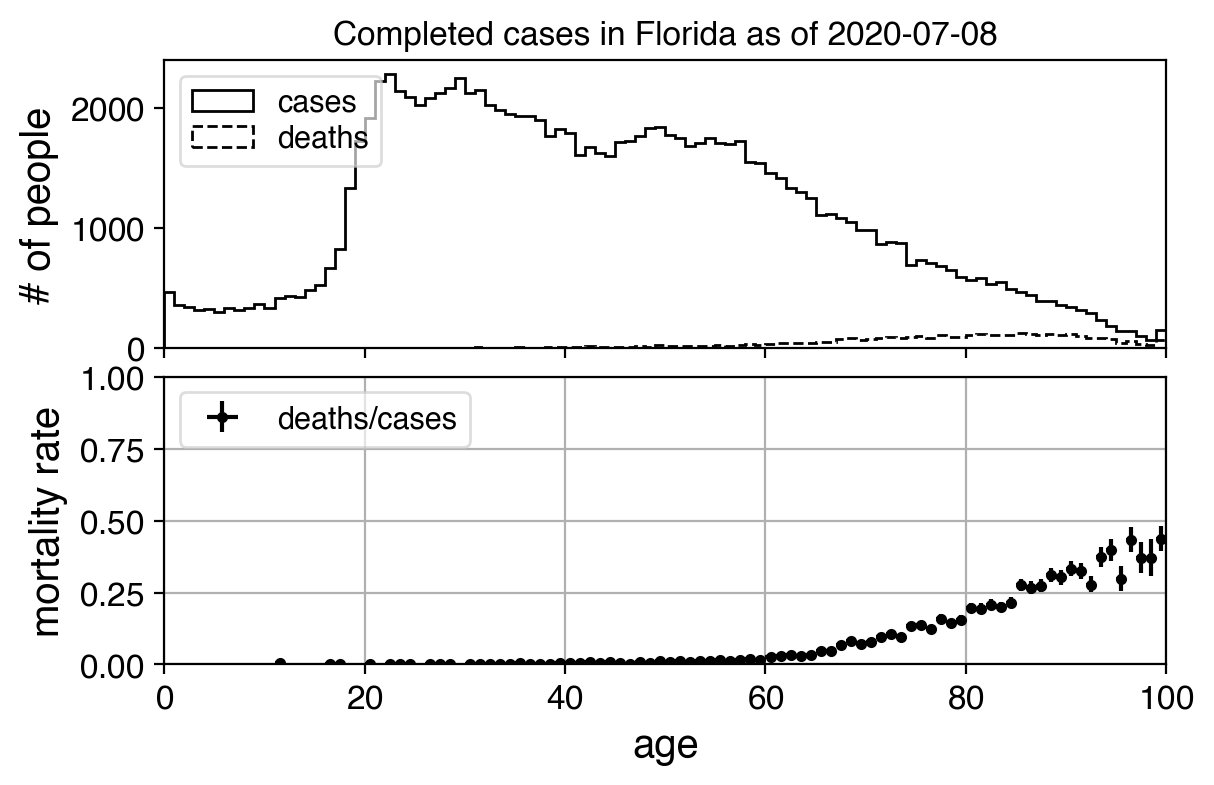

In [32]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)

hnumer, hdenom, hratio = hists_gender("X", bins="100,0,100")
hdenom.plot(ax=ax1, label="cases", histtype="step", color="k")
hnumer.plot(ax=ax1, label="deaths", histtype="step", color="k", linestyle="--")
hratio.plot(ax=ax2, show_errors=True, label="deaths/cases", color="k", ms=3)

last = str(dfc['case'].max()).split()[0]
ax1.set_title(f"Completed cases in Florida as of {last}")
# ax1.set_yscale("log")
ax1.legend(loc="upper left")
ax1.set_ylabel("# of people")

ax2.legend(loc="upper left")
ax2.set_ylabel("mortality rate")
ax2.set_ylim(bottom=0.,top=1.0)
ax2.set_xlabel("age")
ax2.grid()

In [33]:
(hnumer.counts * hnumer.bin_centers).sum() / hnumer.counts.sum()

77.63497267759563

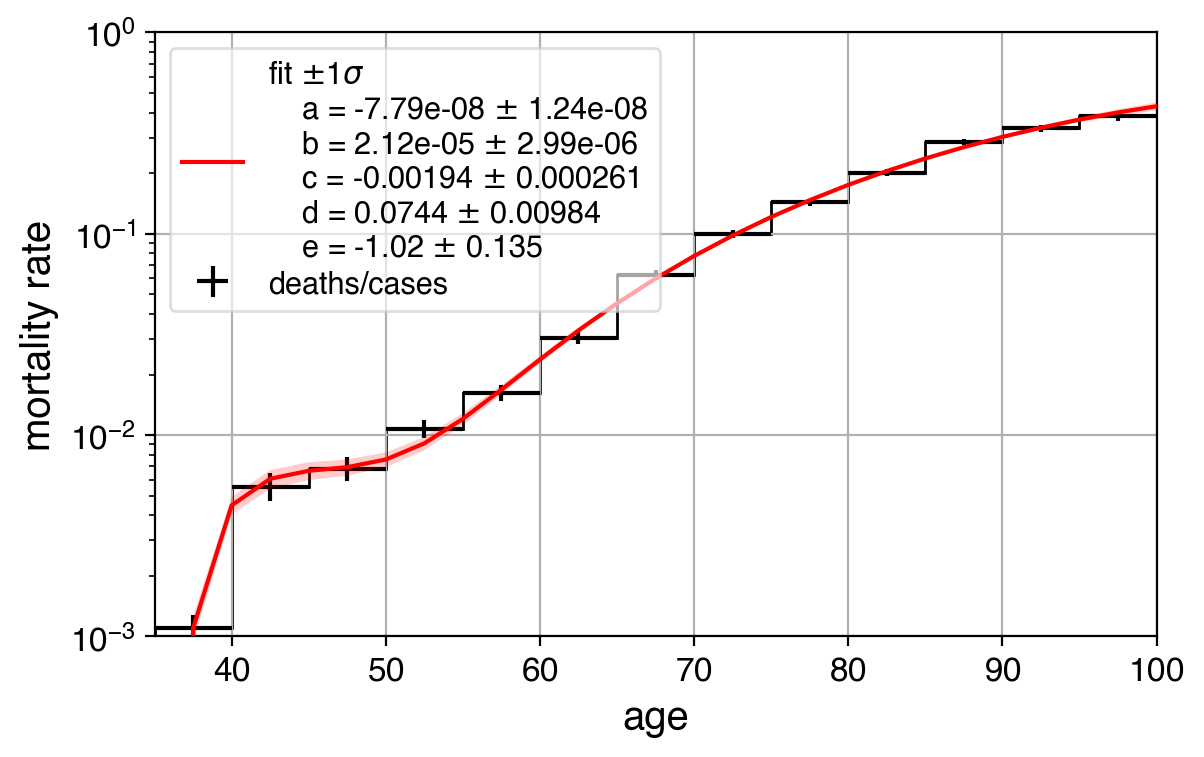

In [34]:
fig, ax = plt.subplots()

hratio = hists_gender("X",bins=np.linspace(35,100,14))[-1]
hratio.plot(ax=ax, color="k", histtype="step")
hratio.plot(ax=ax, show_errors=True, label="deaths/cases", color="k", ms=0)

func = "np.poly1d([a,b,c,d,e])(x)"
res = hratio.fit(func)

ax.legend(loc="upper left")
ax.set_ylabel("mortality rate")
ax.set_ylim(bottom=0.001,top=1.0)
ax.set_yscale("log")
ax.set_xlabel("age")
ax.grid()

In [35]:
# np.poly([1,2,3])
from yahist.utils import expr_to_lambda
# df_cfr = pd.DataFrame()
# np.poly1d([a,b,c,d,e])(x)
poly = expr_to_lambda(func)
ages = np.array([40,50,60,70,80])
cfrs = poly(ages,*res["parvalues"])
df_cfr = pd.DataFrame(dict(cfr=cfrs, age=ages))
df_cfr

,cfr,age
0,0.004479,40
1,0.007563,50
2,0.023748,60
3,0.077579,70
4,0.174899,80


Text(0.5, 1.0, 'Florida cases getting younger')

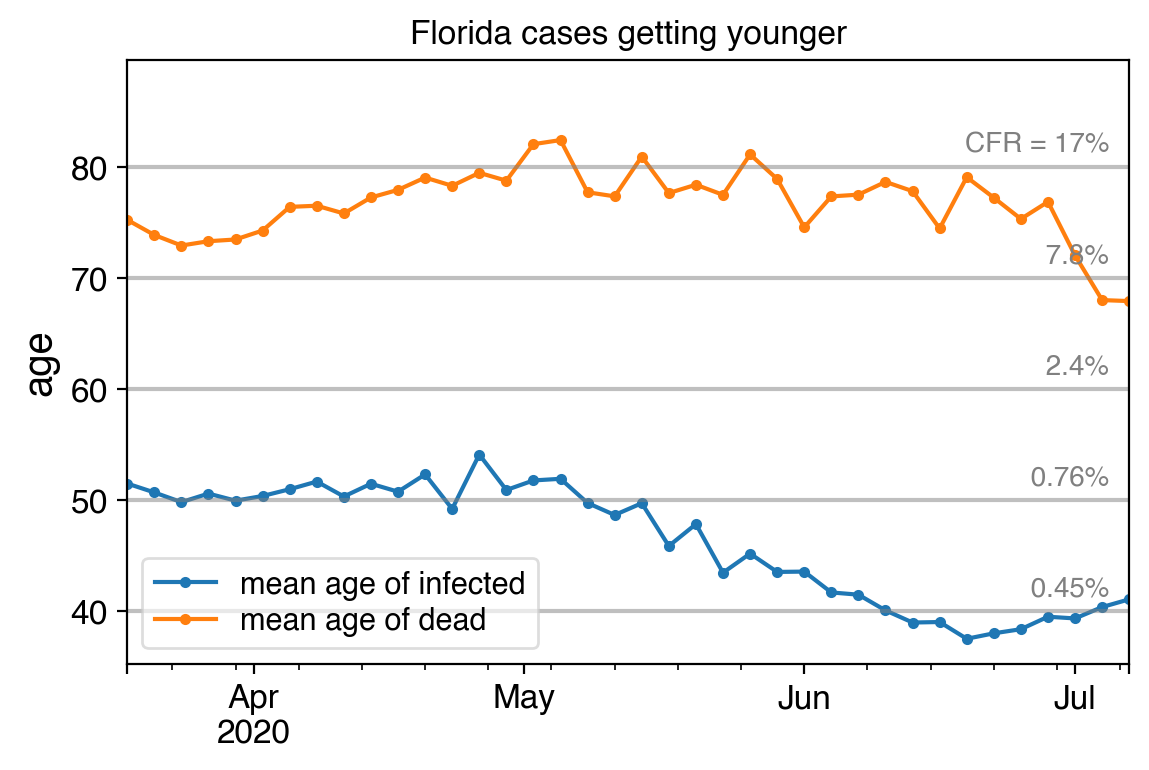

In [36]:
fig, ax = plt.subplots()
interval = "3d"
df = dfc.set_index("case").sort_index()["Mar 18, 2020":]

df.resample(interval)["age"].mean().plot(marker=".",label="mean age of infected")
# df.rolling(interval)["age"].mean().plot(marker=".",label="mean age of infected")

df = df.query("known_status and died")

df.resample(interval)["age"].mean().plot(marker=".",label="mean age of dead")
# df.rolling(interval)["age"].mean().plot(marker=".",label="mean age of dead")

import matplotlib.transforms as transforms
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
for i,row in df_cfr.iterrows():
    cfr = row["cfr"]*100.
    age = row["age"]
    ax.axhline(age, color="gray", alpha=0.5)
    text = "CFR = {:.2g}%".format(cfr)
    if i != len(df_cfr)-1: text = text.replace("CFR =", "")
    ax.text(0.98, age+2.0, text, color="gray", transform=trans, va="center", ha="right", fontsize=10)
ax.set_ylim([None, ax.get_ylim()[1]+5.])
ax.set_xlabel("")
ax.legend()
ax.set_ylabel("age")
ax.set_title("Florida cases getting younger")

Text(0.5, 0, 'age')

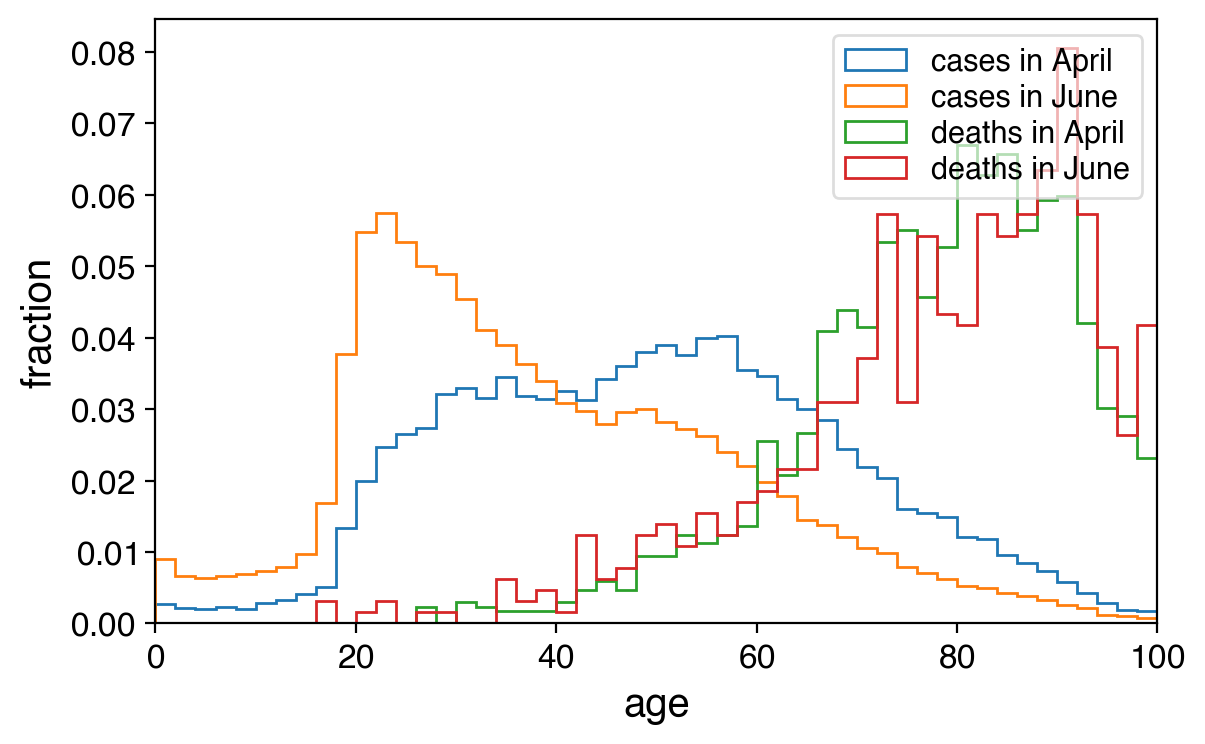

In [25]:
bins = "50,0,100"
df = dfc.set_index("case")
h1 = Hist1D(df["Apr 1, 2020":"Apr 30, 2020"].query("not died")["age"], bins=bins).normalize()
h2 = Hist1D(df["Jun 1, 2020":"Jun 30, 2020"].query("not died")["age"], bins=bins).normalize()
h1.plot(histtype="step", label="cases in April")
h2.plot(histtype="step", label="cases in June")

h1 = Hist1D(df["Apr 1, 2020":"Apr 30, 2020"].query("died")["age"], bins=bins).normalize()
h2 = Hist1D(df["Jun 1, 2020":"Jun 30, 2020"].query("died")["age"], bins=bins).normalize()
h1.plot(histtype="step", label="deaths in April")
h2.plot(histtype="step", label="deaths in June")

plt.gca().set_ylabel("fraction")
plt.gca().set_xlabel("age")

In [32]:

dfc.set_index("case").sort_index()["Feb 21, 2020":]

,age,died,eventdate,gender,hospitalized,known_status
case,,,,,,
2020-03-02 05:00:00,29,False,2020-02-22,F,NO,True
2020-03-02 05:00:00,63,False,2020-02-22,M,YES,True
2020-03-03 05:00:00,22,False,2020-02-25,F,NO,True
2020-03-03 05:00:00,54,False,2020-02-02,M,UNKNOWN,False
2020-03-04 05:00:00,59,False,2020-02-15,F,YES,True
...,...,...,...,...,...,...
2020-07-04 05:00:00,25,False,2020-07-04,M,UNKNOWN,False
2020-07-04 05:00:00,55,False,2020-07-04,F,UNKNOWN,False
2020-07-04 05:00:00,23,False,2020-07-04,M,UNKNOWN,False
